# **Materials Project DB**

In [157]:
my_API = "QAI7gIeWI9TcNFHDghs0UVLjjQC5F4Mn"
# Sign up at materialsproject.org and get your API: https://materialsproject.org/api#api-key

In [156]:
#Install Pymatgen
!pip install pymatgen
import pandas as pd
from pymatgen.ext.matproj import MPRester

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [158]:
#https://api.materialsproject.org/docs#/Materials%20Summary/search_materials_summary__get

with MPRester(my_API) as mpr:
  docs = mpr.summary.search(num_elements =2,exclude_elements=["Np", "Pu", "Am", "Cm", "Bk", "Cf", "Es", "Fm", "Md", "No", "Lr", "Rf", "Db", "Sg", "Bh", "Hs", "Mt", "Ds", "Rg", "Cn",
                          "Nh", "Fl", "Mc", "Lv", "Ts", "Og"],
                          is_stable=True,
                          fields=["material_id",
                          "band_gap", "formation_energy_per_atom",
                          "density_atomic","formula_pretty"])

Retrieving SummaryDoc documents:   0%|          | 0/5149 [00:00<?, ?it/s]

In [159]:
#Let's look at what we got: compositions
formula = [doc.formula_pretty for doc in docs]
len(formula)
print(formula)

['Mg149Tc', 'K5As4', 'CuS2', 'Sm14Ag51', 'GdB6', 'Th2C3', 'YIr', 'TmSe2', 'ZrCr2', 'CaCu5', 'NdOs2', 'Ho2S3', 'NiCl2', 'SnRh', 'Zr7Pt10', 'Nd5Co2', 'Ac2O3', 'Er13Zn58', 'Au3F8', 'EuMg2', 'P4S3', 'Tm3Ru', 'GdSe2', 'Tl7Sb2', 'Ho2In', 'TaSi2', 'Ti2O', 'La5Ru2', 'Dy13Zn58', 'Zn3N2', 'In4Te3', 'TaAs', 'EuPb', 'BeH2', 'ZrSe2', 'SmH2', 'Ag3Pd', 'Tb11Sn10', 'Ti2Pd', 'Yb3Ge8', 'Li17Sn4', 'EuHg3', 'Ca5Au3', 'Sr3P4', 'Mg149In', 'NaCl7', 'Nb3B4', 'PtPb4', 'U3Sb4', 'TbBr3', 'BaF3', 'Yb5Pt3', 'Sb2Os', 'Th2Se3', 'PrSe2', 'Nb5Sb4', 'TeI', 'Nb2Pd', 'Tb2Co17', 'Ho2C', 'Rb4Ge23', 'TbZn2', 'HoHg3', 'GaBr3', 'BaMg', 'RbI', 'Tm3Ir', 'Zr3In', 'CrRh3', 'TmB2', 'Pr5Bi3', 'Dy3Ga5', 'DyRe2', 'Ba3N', 'Tm5Rh3', 'Cd41Ir8', 'CoSb', 'Pa3Te', 'Ca5Si3', 'Y2Se3', 'CsGa3', 'FePt3', 'Mo5As4', 'Ag3Sb', 'Lu2Se3', 'Nb2B3', 'ZrRh3', 'Yb2Ni7', 'BaZn2', 'PmHg3', 'In2O3', 'Tm11Cd45', 'TbIr2', 'Nd5Rh4', 'CrPt3', 'AlV3', 'PrMg', 'Zr2Al3', 'GaCo', 'MgTl', 'Li3Cd', 'Dy3Rh2', 'Cs3P7', 'La7Ru3', 'PrTl', 'Tl2O', 'Tc2As3', 'EuS2', 'Yb5A

In [160]:
#Let's look at what we got: mpids
mpids = [doc.material_id for doc in docs]
len(mpids)
print(mpids)

[MPID(mp-1185636), MPID(mp-1223503), MPID(mp-849086), MPID(mp-1219378), MPID(mp-22266), MPID(mp-1188514), MPID(mp-30746), MPID(mp-1072474), MPID(mp-903), MPID(mp-1882), MPID(mp-569630), MPID(mp-878), MPID(mp-27396), MPID(mp-317), MPID(mp-1207440), MPID(mp-1104652), MPID(mp-11107), MPID(mp-1203997), MPID(mp-17407), MPID(mp-1184321), MPID(mp-1468), MPID(mp-1207837), MPID(mp-1018707), MPID(mp-621624), MPID(mp-20686), MPID(mp-11192), MPID(mp-1215), MPID(mp-1104417), MPID(mp-1197303), MPID(mp-9460), MPID(mp-617281), MPID(mp-1936), MPID(mp-20394), MPID(mp-768203), MPID(mp-2076), MPID(mp-24658), MPID(mp-985296), MPID(mp-1201140), MPID(mp-13164), MPID(mp-570278), MPID(mp-573471), MPID(mp-1080132), MPID(mp-30368), MPID(mp-14288), MPID(mp-1185594), MPID(mp-1080771), MPID(mp-10255), MPID(mp-21296), MPID(mp-392), MPID(mp-863746), MPID(mp-1183303), MPID(mp-1190212), MPID(mp-2695), MPID(mp-1105994), MPID(mp-570205), MPID(mp-274), MPID(mp-569766), MPID(mp-1220678), MPID(mp-1189067), MPID(mp-1640), MP

In [161]:
example_doc = docs[0]
example_doc.band_gap

0.09779999999999989

In [162]:
import pandas as pd
#Initializing an empty dictionary:
D={'density_atomic':[],"formation_energy_per_atom":[],'band_gap':[],'material_id':[],'formula':[],'AtomicRadius':[],"NumberofElectrons":[], "Electronegativity":[], "FirstIonization":[]}
#Looping through docs and appending data to the dictionary
for doc in docs:
      D['density_atomic'].append(doc.density_atomic)
      D['band_gap'].append(doc.band_gap)
      D['material_id'].append(doc.material_id)
      D['formula'].append(doc.formula_pretty)
      D['formation_energy_per_atom'].append(doc.formation_energy_per_atom)
      D['AtomicRadius'].append(0)
      D["NumberofElectrons"].append(0)
      D["Electronegativity"].append(0)
      D["FirstIonization"].append(0)

#Creating a DataFrame using the dictionary data
mp_query = pd.DataFrame(D)
#Reading a CSV file into another DataFrame
df = pd.read_csv('periodic_table_final.csv')





In [163]:
#look at the first 5 rows of the dataFrame
mp_query.head()

,density_atomic,formation_energy_per_atom,band_gap,material_id,formula,AtomicRadius,NumberofElectrons,Electronegativity,FirstIonization
0,22.877356,-0.018674,0.0978,mp-1185636,Mg149Tc,0,0,0,0
1,32.273652,-0.437151,0.0000,mp-1223503,K5As4,0,0,0,0
2,16.316454,-0.432674,0.0000,mp-849086,CuS2,0,0,0,0
3,20.401661,-0.246306,0.0000,mp-1219378,Sm14Ag51,0,0,0,0
4,9.856148,-0.456620,0.0000,mp-22266,GdB6,0,0,0,0


In [164]:
df.head()

,Unnamed: 0,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,...,Nonmetal,Metalloid,Type,AtomicRadius,Electronegativity,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes
0,0,1.0,Hydrogen,H,1.007,0.0,1.0,1.0,1.0,1.0,...,yes,NaN,Nonmetal,0.79,2.20,13.5984,0.000090,14.175,20.28,3.0
1,1,2.0,Helium,He,4.002,2.0,2.0,2.0,1.0,18.0,...,yes,NaN,Noble Gas,0.49,0.00,24.5874,0.000179,0.950,4.22,5.0
2,2,3.0,Lithium,Li,6.941,4.0,3.0,3.0,2.0,1.0,...,NaN,NaN,Alkali Metal,2.10,0.98,5.3917,0.534000,453.850,1615.00,5.0
3,3,4.0,Beryllium,Be,9.012,5.0,4.0,4.0,2.0,2.0,...,NaN,NaN,Alkaline Earth Metal,1.40,1.57,9.3227,1.850000,1560.150,2742.00,6.0
4,4,5.0,Boron,B,10.811,6.0,5.0,5.0,2.0,13.0,...,NaN,yes,Metalloid,1.20,2.04,8.2980,2.340000,2573.150,4200.00,6.0


In [165]:
df.set_index("Symbol", inplace=True)
df.loc['Mg']["AtomicRadius"] #will give you the atomic radius for O

1.7

In [166]:
from pymatgen.core import Composition
comp = Composition('FeO2')
comp.elements # this will give you the elements
comp.get_atomic_fraction('Fe') # this will give you the atomic fraction of O in FeO2.

0.3333333333333333

In [167]:
str(comp.elements[1])

'O'

In [168]:
for i in range(0, len(mp_query['formula'])):
  comp = Composition(mp_query['formula'][i])
  A = str(comp.elements[0])
  B = str(comp.elements[1])
  A_fract = comp.get_atomic_fraction(A)
  B_fract = comp.get_atomic_fraction(B)
  average_AtomicRadius= df.loc[A]["AtomicRadius"]*A_fract+df.loc[B]["AtomicRadius"]*B_fract
  mp_query['AtomicRadius'][i]=average_AtomicRadius

  average_NumberofElectrons= df.loc[A]["NumberofElectrons"]*A_fract+df.loc[B]["NumberofElectrons"]*B_fract
  mp_query["NumberofElectrons"][i]=average_NumberofElectrons

  average_Electronegativity	= df.loc[A]["Electronegativity"]*A_fract+df.loc[B]["Electronegativity"]*B_fract
  mp_query["Electronegativity"][i]=average_Electronegativity

  average_FirstIonization	= df.loc[A]["FirstIonization"]*A_fract+df.loc[B]["FirstIonization"]*B_fract
  mp_query["FirstIonization"][i]=average_FirstIonization


<ipython-input-168-84fb8d936438>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mp_query['AtomicRadius'][i]=average_AtomicRadius
<ipython-input-168-84fb8d936438>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mp_query["NumberofElectrons"][i]=average_NumberofElectrons
<ipython-input-168-84fb8d936438>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mp_query["Electronegativity"][i]=average_Electronegativity
<ipython-input-168-84fb8

In [169]:
#Define band_gap < 0.001 as metallic (0) and band_gap >= 0.001 as nonmetallic (1)
mp_query['band_gap'] = pd.to_numeric(mp_query['band_gap'], errors='coerce')

# Add a new column 'metallicity' based on the condition
mp_query['metallicity'] = mp_query['band_gap'].apply(lambda x: 0 if x < 0.001 else 1)

In [170]:
mp_query.head()

,density_atomic,formation_energy_per_atom,band_gap,material_id,formula,AtomicRadius,NumberofElectrons,Electronegativity,FirstIonization,metallicity
0,22.877356,-0.018674,0.0978,mp-1185636,Mg149Tc,1.702000,12.206667,1.313933,7.643759,1
1,32.273652,-0.437151,0.0000,mp-1223503,K5As4,2.133333,25.222222,1.424444,6.761989,0
2,16.316454,-0.432674,0.0000,mp-849086,CuS2,1.266667,20.333333,2.353333,9.482133,0
3,20.401661,-0.246306,0.0000,mp-1219378,Sm14Ag51,1.972308,50.230769,1.766308,7.159969,0
4,9.856148,-0.456620,0.0000,mp-22266,GdB6,1.385714,13.428571,1.920000,7.991157,0


In [171]:
#Look at the shape of our dataFrame
mp_query.shape

(5149, 10)

In [172]:
#See how many unique materials we have in the dataFrame
num_materials = mp_query['formula'].nunique()
print(f"There are {num_materials} unique materials in the dataset.")


There are 5149 unique materials in the dataset.


In [173]:
#To see how many duplicate dataset we have
import pandas as pd
duplicates = mp_query.duplicated()

if duplicates.any():
    print("Duplicates found in the dataset.")

else:
    print("No duplicates found in the dataset.")


No duplicates found in the dataset.


In [174]:
# Check for missing values
missing_values = mp_query.isnull().sum().sum()

# Print the result
if missing_values > 0:
    print(f"Dataset contains {missing_values} missing values.")
else:
    print("Dataset does not contain any missing values.")


Dataset does not contain any missing values.


In [175]:
# Check for string values
string_columns = mp_query.select_dtypes(include='object').columns
if len(string_columns) > 0:
    print("Dataset contains string values.")

columns_check= ['density_atomic', 'band_gap', 'AtomicRadius', 'NumberofElectrons', 'Electronegativity', 'FirstIonization']

for column in columns_check:
    if mp_query[column].dtype != 'object':
        print(f"Skipping column '{column}' as it does not contain string values.")
        continue


Dataset contains string values.
Skipping column 'density_atomic' as it does not contain string values.
Skipping column 'band_gap' as it does not contain string values.
Skipping column 'AtomicRadius' as it does not contain string values.
Skipping column 'NumberofElectrons' as it does not contain string values.
Skipping column 'Electronegativity' as it does not contain string values.
Skipping column 'FirstIonization' as it does not contain string values.


# **Spilliting the Dataset **

In [176]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Split the dataset into features (X) and target variable (y)
X = mp_query[["AtomicRadius", "NumberofElectrons", "Electronegativity", "FirstIonization"]]
y = mp_query['formation_energy_per_atom']

# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

**Is Dataset Balanced?**

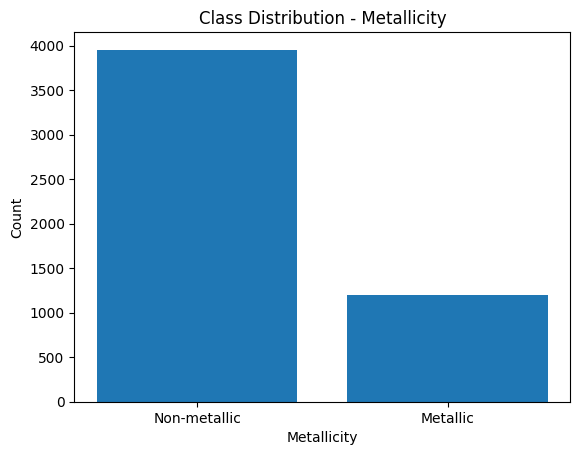

Non-metallic: 3955 samples (76.81%)
Metallic: 1194 samples (23.19%)


In [177]:
#Looking to the Metallicity to see whether our dataFrame is balanced or not in terms of Metallicity

import matplotlib.pyplot as plt
import pandas as pd
# Calculate the class frequencies
class_counts = mp_query['metallicity'].value_counts()
class_names = ['Non-metallic', 'Metallic']
class_values = [class_counts[0], class_counts[1]]
total_samples = mp_query.shape[0]
class_percentages = [count / total_samples * 100 for count in class_values]

# Plot the class distribution
fig, ax = plt.subplots()
ax.bar(class_names, class_values)
ax.set_xlabel('Metallicity')
ax.set_ylabel('Count')
ax.set_title('Class Distribution - Metallicity')
plt.show()

# Print the class frequencies and percentages
for i in range(len(class_names)):
    print(f"{class_names[i]}: {class_values[i]} samples ({class_percentages[i]:.2f}%)")

#------------------------------------------------------------------------------------------------------------------------------------------
#Based on the following figure, we can see the height of the non-metallic compounds is higher than mettalic ones,
#which shows that the number of non-metallic compound is more than metallic ones, therefore the dataFrame in terms of
#Metallicity is not balanced. If the number of them were closely equal, it would be balanced

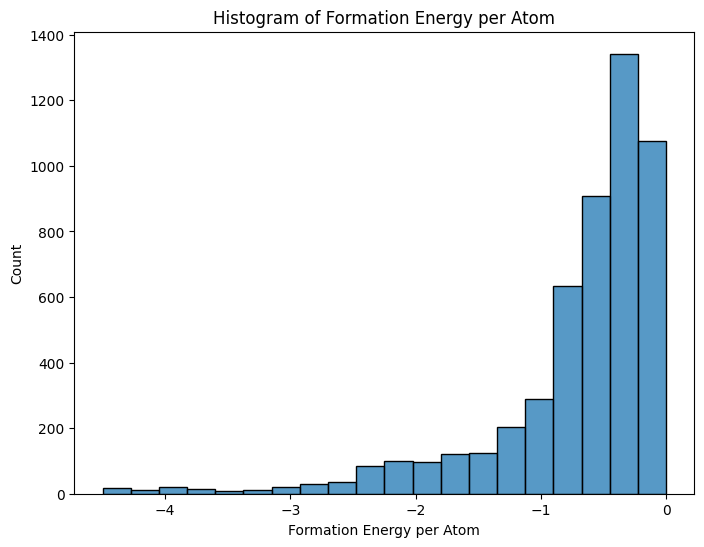

In [178]:
#Looking at the histogram of formation energy per atom to see whether our dataFrame is balanced or not.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Plot histogram of formation energy per atom
plt.figure(figsize=(8, 6))
sns.histplot(data=mp_query, x='formation_energy_per_atom', bins=20)
plt.xlabel('Formation Energy per Atom')
plt.ylabel('Count')
plt.title('Histogram of Formation Energy per Atom')
plt.show()
#------------------------------------------------------------------------------------------------------------------------------------------
#Based on the following plot, the dataframe is not balanced because the number of the distribution of the Formation
#per energy is not equal. if the height(the number) of each of FEPA was eqaul, we could say the dataFrame was balanced.

# **Linear Regression Model**

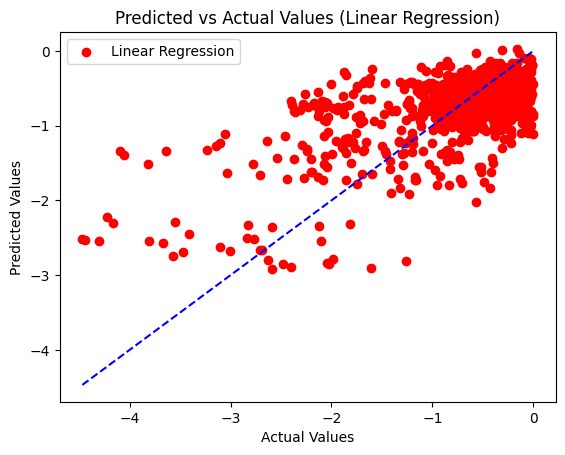

Mean Absolute Error (MAE): 0.39512251128746567
Mean Squared Error (MSE): 0.30282829990353227
R-squared (R2) Score: 0.4268152289212377


In [179]:
#Linear Regression model
# Build linear regression model
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
#Buidling the Linearregression model:
linear_regression_model = LinearRegression()
#Train the model
linear_regression_model.fit(X_train, y_train)
# Make predictions on the test set
y_test_pred_linear = linear_regression_model.predict(X_test)
#Plot the model
plt.scatter(y_test, y_test_pred_linear, color='red', label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Linear Regression)')
plt.legend()
plt.show()
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Evaluate the model
mae = mean_absolute_error(y_test, y_test_pred_linear)
mse = mean_squared_error(y_test, y_test_pred_linear)
r2 = r2_score(y_test, y_test_pred_linear)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)



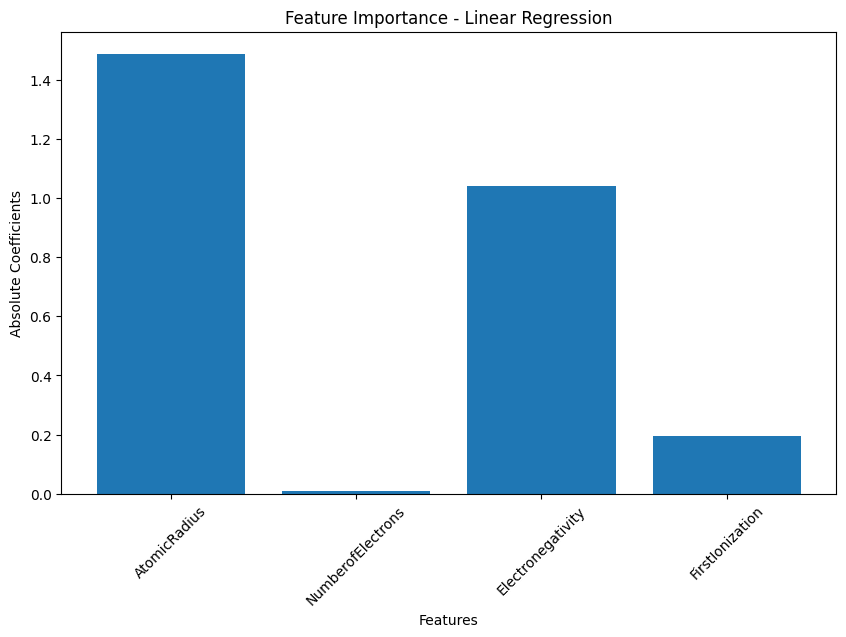

In [180]:
#plot the feature importance in a linear regression model
import numpy as np
import matplotlib.pyplot as plt


# Extract the coefficients
coefficients = linear_regression_model.coef_

# Get the absolute values of the coefficients
abs_coefficients = np.abs(coefficients)

# Get the feature names from your dataset
feature_names = X.columns
# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_names, abs_coefficients)
plt.xlabel('Features')
plt.ylabel('Absolute Coefficients')
plt.title('Feature Importance - Linear Regression')
plt.xticks(rotation=45)
plt.show()
#------------------------------------------------------------------------------------------------------------------------------------------
#The coefficient represents the change in the target variable for a one-unit change in the corresponding feature while
# keeping other features constant. A higher absolute coefficient indicates a larger impact on the target variable.
#Therefore, "Atomic Radius" has a relatively larger influence on the predicted values compared to other features.
#At the same time, based on the following plot. Number of electrons has the lowest impact on the formation Energy per atom

In [181]:
#Regularizion of linear regression model by Lasso regression model:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10]}

# Create the Lasso regression model
lasso = Lasso()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_lasso = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

# Make predictions on the test set
y_pred = best_lasso.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best alpha: {best_alpha}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

#------------------------------------------------------------------------------------------------------------------------------------------
#Based on the following result, the best alpha is 0.01, because it gives us the highest R2.

Best alpha: 0.01
Mean Squared Error: 0.3077
R-squared: 0.4175


In [185]:
#Feature importance in the Lasso model:
from sklearn.linear_model import Lasso
import numpy as np

# Split the dataset into features (X) and target variable (y)
#X = mp_query[["AtomicRadius", "NumberofElectrons", "Electronegativity", "FirstIonization"]]
#y = mp_query['metallicity']

# Create a Lasso regression model
model = Lasso(alpha=0.01)  # Set the alpha parameter

# Train the model
model.fit(X, y)

# Get the coefficients and feature names
coefficients = model.coef_
feature_names = X.columns

# Sort the coefficients in descending order of absolute magnitude
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Print the feature importance
print("Feature Importance (Lasso Coefficients):")
for feature, coef in zip(sorted_feature_names, sorted_coefficients):
    print(f"{feature}: {coef:.2f}")


Feature Importance (Lasso Coefficients):
FirstIonization: 0.08
Electronegativity: 0.04
NumberofElectrons: -0.00
AtomicRadius: -0.00


# **Random Forest Regressor Model**

In [186]:
#Choosing the best hyperparameter for Random Forest Regressor Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [1 ,2, 5, 10],
    'n_estimators': [50, 100, 200, 300]
}
model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)
# Evaluate on the validation set
ypred_val = best_model.predict(X_val)
mse_validation = mean_squared_error(y_val, ypred_val)
r2_validation = r2_score(y_val, ypred_val)

print("Best Parameters:", best_params)
print("Best Mean Squared Error:", -best_score)
print("Validation Set - Mean Squared Error:", mse_validation)
print("Validation Set - R-squared:", r2_validation)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best Parameters: {'max_depth': 9, 'min_samples_split': 2, 'n_estimators': 300}
Best Mean Squared Error: 0.19613532098104308
Validation Set - Mean Squared Error: 0.17642655593346587
Validation Set - R-squared: 0.5995141737704536


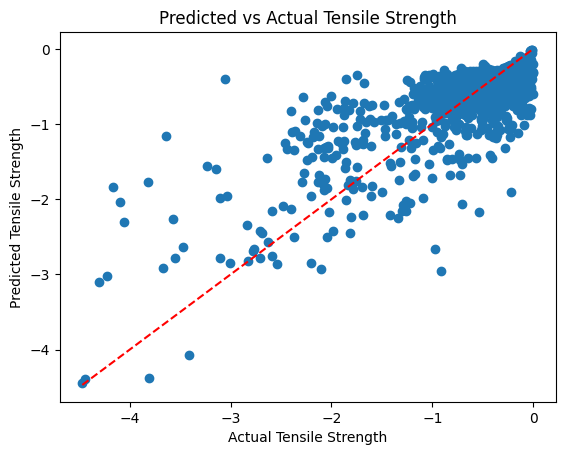

Mean Absolute Error (MAE): 0.30796111877338056
Mean Squared Error (MSE): 0.20940537884155108
R-squared (R2) Score: 0.603643470005308


In [187]:
# Create a Random Forest Regression model with the best hyperparameters obtained from the above code
best_random_forest_model = RandomForestRegressor(n_estimators=300, max_depth=9)

# Train the model on the training set
best_random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = best_random_forest_model.predict(X_test)

plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Predicted vs Actual Tensile Strength')
plt.show()
#measuring the matrix
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

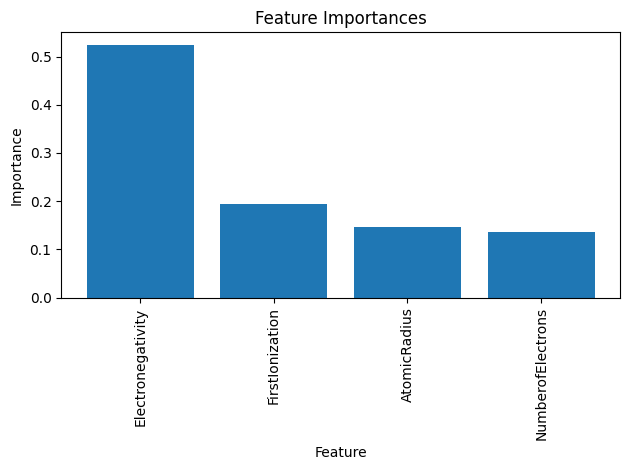

In [190]:
#Visualize the feature importances obtained from a trained Random Forest model by the relative contribution
#of each feature in the model's decision-making process.
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
importances = best_random_forest_model.feature_importances_

# Get the feature names
feature_names = X.columns  # Replace with your actual feature column names

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure()
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()
#------------------------------------------------------------------------------------------------------------------------------------------
# Based on the following plot, "Electronegativity" contains valuable information that strongly influences the prediction of the "Formation Energy per atom".
#It implies that changes or variations in the "Electronegativity" value have a substantial impact on the outcome of the model.

# **Decission Tree Model**

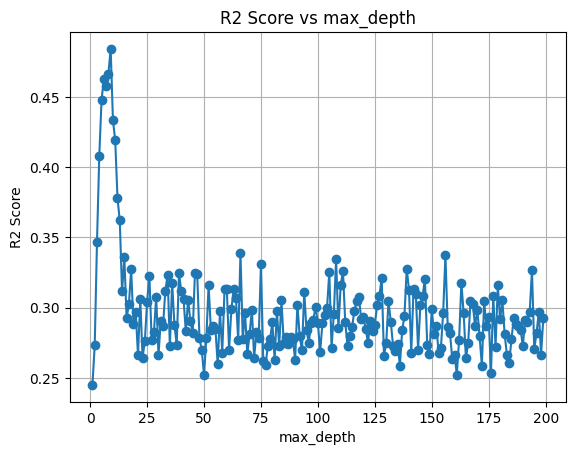

Highest R2 score: 0.48450888344238807
Corresponding max_depth: 9


In [189]:
#Find the best max depth for Decission Tree model
# Define a range of max_depth values to evaluate
max_depths = range(1, 200)

# Lists to store the max_depth and R2 scores
depth_values = []
r2_scores = []

# Iterate over max_depth values
for depth in max_depths:
    # Build the decision tree model
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)

    # Make predictions on validation set
    y_val_pred = model.predict(X_val)

    # Calculate R2 score
    r2 = r2_score(y_val, y_val_pred)

    # Store max_depth and R2 score
    depth_values.append(depth)
    r2_scores.append(r2)

# Plotting R2 score vs max_depth
plt.plot(depth_values, r2_scores, marker='o')
plt.xlabel('max_depth')
plt.ylabel('R2 Score')
plt.title('R2 Score vs max_depth')
plt.grid(True)
plt.show()

max_r2_index = r2_scores.index(max(r2_scores))

# Get the corresponding max_depth value
best_max_depth = depth_values[max_r2_index]

# Print the highest R2 score and its corresponding max_depth value
print("Highest R2 score:", max(r2_scores))
print("Corresponding max_depth:", best_max_depth)

Mean Absolute Error (MAE): 0.28304397733153613
Mean Squared Error (MSE): 0.17642655593346587
R-squared (R2): 0.5995141737704536


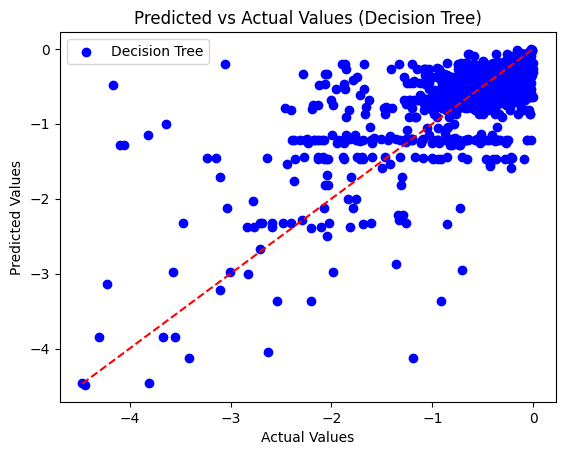

In [191]:
# Build the decision tree model
decision_tree_model = DecisionTreeRegressor(max_depth=best_max_depth)
decision_tree_model.fit(X_train, y_train)


# Make predictions on the validation set
y_test_pred_tree = decision_tree_model.predict(X_test)

# Calculate metrics for validation set
mae = mean_absolute_error(y_val, ypred_val)
mse = mean_squared_error(y_val, ypred_val)
r2 = r2_score(y_val, ypred_val)

# Print the metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Plot predicted vs actual values for decision tree model
plt.scatter(y_test, y_test_pred_tree, color='blue', label='Decision Tree')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Decision Tree)')
plt.legend()
plt.show()

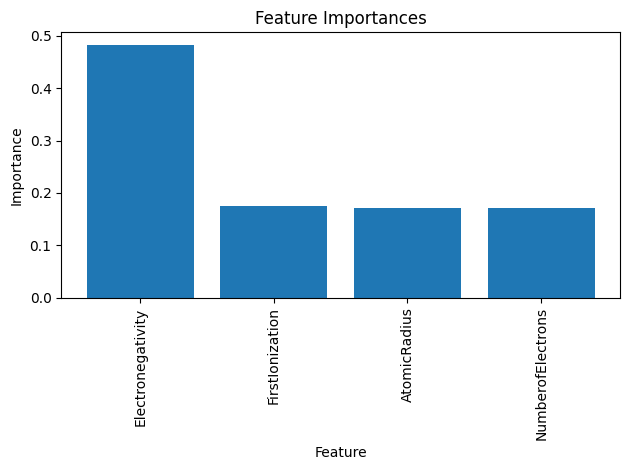

In [192]:
#Visualize the feature importances obtained from a trained Decission Tree model by the relative contribution
#of each feature in the model's decision-making process.
import numpy as np
import matplotlib.pyplot as plt

# Train the Decision Tree model
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

# Get the feature importances from the trained model
importances = decision_tree_model.feature_importances_

# Get the feature names
feature_names = X.columns  # Replace with your actual feature column names

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure()
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

#------------------------------------------------------------------------------------------------------------------------------------------
# Based on the following plot, the "Electronegativity" has the highest contribution on predictin the "Formation energy per atom", while "Atomic Radious"
# has the lowest impact.

**Notes:**

Electronegativity is a fundamental property of elements that describes their ability to attract electrons in a chemical bond. It indicates the tendency of an atom to gain or lose electrons when forming chemical compounds. The formation energy per atom is influenced by the arrangement and bonding of atoms within a material. The electronegativity of the constituent elements plays a crucial role in determining the strength and nature of chemical bonding, which, in turn, affects the stability and energy of the material.That is why Electronegativity has higher importance in predicting the formation energy per atom.

The first ionization energy is the energy required to remove the outermost electron from an atom in its gaseous state. The removal of an electron affects the balance of attractive and repulsive forces within the atom, which can impact the formation energy of compounds. The first ionization energy could also effect the electrostatic interaction and bonding energy, which both effects the formation energy per atom.

At the same time, "Atomic Radius" and "Number of electron" has the lowest importance on prediction the formation energy per atom, because the atomic radius alone cannot provide sufficient information about the structural arrangement, coordination number, lattice type or chemical bonding. Also,  The number of electrons in an atom contributes to its electronegativity, which affects the strength and type of chemical bonds formed between atoms. However, the impact of electron number on formation energy per atom can be overshadowed by other factors such as electronegativity differences between elements.


Even in the linear regression model, after regularization by lasso regression model, it gives us the idea of reducing the effect of atomic radius and number of electrons and increasing the importance of first ionization and electronagitivity which gives us better prediction on formation energy per atom.

# **Classification Model**

# **Decision Tree Classifier**

In [193]:
# Split the dataset into features (X) and target variable (y)
X = mp_query[["AtomicRadius", "NumberofElectrons", "Electronegativity", "FirstIonization"]]
y = mp_query['metallicity']

# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

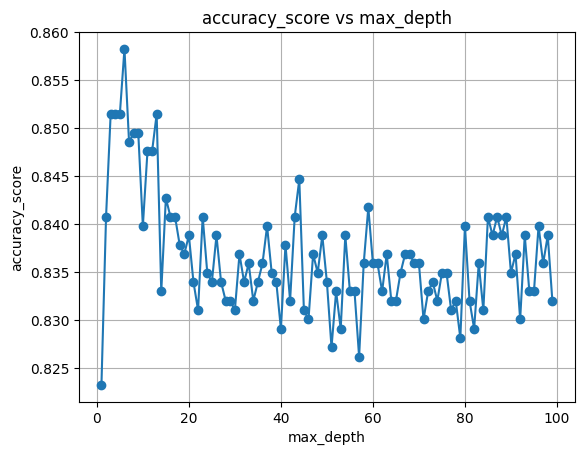

Highest accuracy_score: 0.858252427184466
Corresponding max_depth: 9


In [194]:
#Measuring the best max depth for decission tree classifier
max_depths = [x for x in range(1,100)]

# Lists to store the max_depth and R2 scores
depth_values = []
accuracy_score_list = []

# Iterate over max_depth values
for depth in max_depths:
    # Build the decision tree model
    model = DecisionTreeClassifier (criterion ="entropy" ,max_depth = depth)
    model.fit(X_train, y_train)

    # Make predictions on validation set
    y_val_pred = model.predict(X_val)

    # Calculate R2 score
    # accuracy_score_n = accuracy_score(y_val, y_val_pred)
    # Store max_depth and R2 score
    depth_values.append(depth)
    accuracy_score_list.append(accuracy_score(y_val, y_val_pred))

# Plotting R2 score vs max_depth
plt.plot(depth_values, accuracy_score_list, marker='o')
plt.xlabel('max_depth')
plt.ylabel('accuracy_score')
plt.title('accuracy_score vs max_depth')
plt.grid(True)
plt.show()

max_accuracy_score = accuracy_score_list.index(max(accuracy_score_list))

# Get the corresponding max_depth value
best_max_depth = depth_values[max_r2_index]

# Print the highest R2 score and its corresponding max_depth value
print("Highest accuracy_score:", max(accuracy_score_list))
print("Corresponding max_depth:", best_max_depth)

In [195]:
#Making the decission tree classofier model
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into features (X) and target variable (y)
X = mp_query[["AtomicRadius", "NumberofElectrons", "Electronegativity", "FirstIonization"]]
y = mp_query['metallicity']

# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

model_Decision_Class= DecisionTreeClassifier(criterion ="entropy" ,max_depth =best_max_depth)
model_Decision_Class.fit(X_train, y_train)
# Predict
y_test_pred = model_Decision_Class.predict(X_test)
# Accuracy score

print(accuracy_score(y_test, y_test_pred))

0.8242718446601942


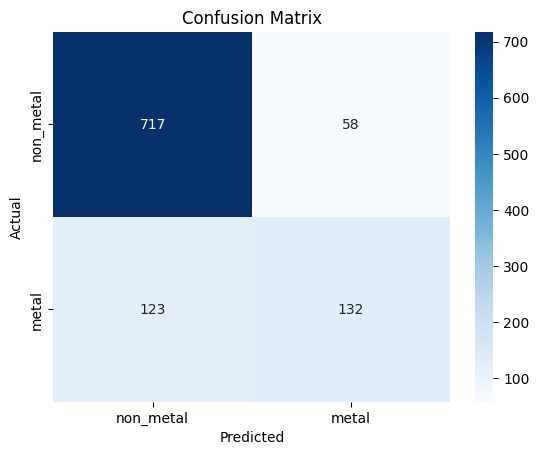

In [196]:
#plotting confusion matrix for decission tree classifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
class_names_X = ['non_metal', 'metal']
class_names_Y =['non_metal', 'metal']
# Show the plot
plt.show()
#class_names = np.unique(y)
fig, ax = plt.subplots()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(class_names_X)
ax.set_yticklabels(class_names_Y)
plt.title('Confusion Matrix')
plt.show()


**Note:**

In the above confusion matrix, we can see the number of non-metal in real life and the one that was predicted to be non-metal is 712 which means that 712 compound were predicted correctly in terms of being non-metal. Also, 143 compound predicted to be metal and they are meatl in real life too.
We only have 175 wrong prediction in this model


In [197]:
#calculating the feature importance in decision tree classifier

# Get feature importances
importances = model_Decision_Class.feature_importances_
print(importances)

# Create a DataFrame to store the feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the feature importances in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances)


[0.18492048 0.13797021 0.20808175 0.46902757]
             Feature  Importance
3    FirstIonization    0.469028
2  Electronegativity    0.208082
0       AtomicRadius    0.184920
1  NumberofElectrons    0.137970


# **Random Forest Classifier**

Validation Accuracy: 0.8728155339805825
Testing Accuracy: 0.8475728155339806


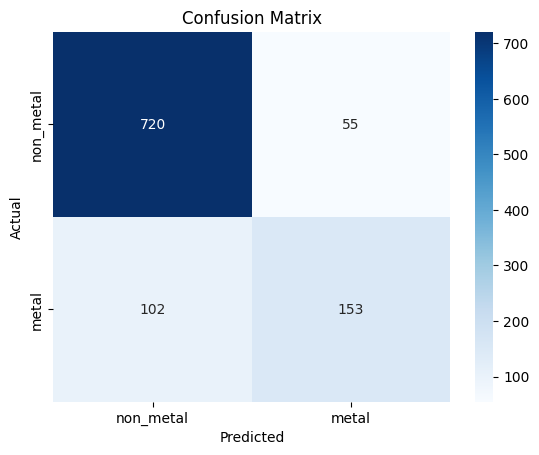

In [198]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Random Forest Classifier
model_Random_Class= RandomForestClassifier(n_estimators=300, random_state=42)

# Train the model
model_Random_Class.fit(X_train, y_train)

# Predict labels

y_val_pred =model_Random_Class.predict(X_val)
y_test_pred = model_Random_Class.predict(X_test)

# Calculate accuracy

val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Create confusion matrices

conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Print accuracy scores
print("Validation Accuracy:", val_accuracy)
print("Testing Accuracy:", test_accuracy)


class_names_X = ['non_metal', 'metal']
class_names_Y =['non_metal', 'metal']

fig, ax = plt.subplots()
sns.heatmap(conf_matrix_test, annot=True, cmap='Blues', fmt='d', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(class_names_X)
ax.set_yticklabels(class_names_Y)
plt.title('Confusion Matrix')
plt.show()

**Note:**

In the above confusion matrix, we can see that 722+155 compounds were predicted correctly to be non-metal and metal respectively. Also, 154+49 were predicted wrongly.

In [199]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Get feature importances
importances = model_Random_Class.feature_importances_
print(importances)

# Create a DataFrame to store the feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the feature importances in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances)


[0.22989029 0.17907127 0.29633715 0.29470129]
             Feature  Importance
2  Electronegativity    0.296337
3    FirstIonization    0.294701
0       AtomicRadius    0.229890
1  NumberofElectrons    0.179071


**Notes:**

Based on the above classification models, the accuracy of the Random Forest classifier was better than Decission Tree model because Random Forest mitigates overfitting by building multiple decision trees on different subsets of the training data and aggregating their predictions. Also, Random forest by combining predictions from multiple trees, it can capture a wider range of patterns and relationships within the data.

In terms of feature importance, we can see that in both of them number oif electron has the lowest importance for predicting the metallicity because the number of electrons in an atom is often correlated with other features, such as atomic radius or electronegativity. If these correlated features have a stronger relationship with metallicity, the direct impact of the number of electrons may appear relatively weaker.

# **Drawbacks of the models and possible ways to to increase their predective power:**
1.   **Linear regression:**
*   Linear regression assumes a linear relationship between the features and the target variable, which may not hold true in all cases.
*   It is sensitive to outliers and can be affected by the presence of influential data points.


>*possible strategies:*
*   Use regularization techniques like Lasso or Ridge regression to handle multicollinearity and prevent overfitting.
*   Include interaction terms or higher-order terms to capture non-linear relationships.


2.  **Decision Tree Regressor:**
*   Decision trees can easily overfit the training data, leading to poor generalization on unseen data
>*possible strategies:*
*   Use techniques like pruning, limiting the maximum depth, or setting a minimum number of samples per leaf to prevent overfitting.


3.   **Random Forest Regressor:**


*   Random forests can struggle with extrapolation, as they rely on the training data distribution and may not generalize well to unseen regions.

>*possible strategies:*
*  Adjust hyperparameters like the number of trees, maximum depth, and minimum samples per leaf to optimize the model's performance.


4.   **Decision Tree Classifier:**
*  Decision trees can suffer from overfitting, especially when dealing with imbalanced datasets or noisy data.
*  They can create biased trees if there are rare classes or if certain features dominate the splitting criteria.

>*possible strategies:*
*  Employ techniques like pruning, setting class weights, or adjusting the minimum number of samples per leaf to address overfitting.
*  Use ensemble methods like random forests or gradient boosting to improve generalization and accuracy.

5.   **Random Forest Classifier:**
*  Random forests can be sensitive to noisy or irrelevant features, potentially impacting model performance.

>*possible strategies:*
*  Optimize hyperparameters like the number of trees, maximum depth, and minimum samples per leaf through cross-validation.
*  Use feature selection techniques to identify the most informative features and reduce noise.
















# **Materials Information**

To improve the prediction of the models in terms of "Prediction energy per atom" and "metallicity", the following features could be beneficial:


*   Crystal Structure and Composition


> Information about the crystal structure, such as lattice parameters, space group, or coordination numbers, can provide insights into the arrangement of atoms and their interactions.Also, Composition-related features, including the types and ratios of elements present in the material, can be valuable for predicting its properties.


*   Electronic Properties


> Consideration of features related to electronic transport, such as conductivity, mobility, or Seebeck coefficient, may also be relevant.


*  Physical and Mechanical Properties



> Mechanical properties such as Young's modulus, Poisson's ratio, hardness, or tensile strength can provide information about the material's strength and durability.




